# The goal of this notebook to develop a machine learning model that can predict the reduction potentials of molecules based on the molecular fingerprints and descriptors

In [106]:
import pandas as pd
pd.set_option('display.max_columns', None)
import Chemfunctions as chemfun
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import rdkit.Chem as Chem

# Download data from the github repo

In [107]:
url="https://raw.githubusercontent.com/akashjn/DataScience/main/Data/BTZ_5442mols_smiles_redpot.csv"
df=pd.read_csv(url)
# df=df.sample(n=1000,ignore_index=True)
df=df[:1000]
df.head()

,SMILES,ERed
0,Cc1c2c(cc3nsnc13)N(C)CCN2CCN(C)C,1.27
1,CCN1CCN(CCOC)c2c1cc1nsnc1c2C,1.27
2,CCNc1c2c(cc3nsnc13)N(C)CCN2C(C)C,1.24
3,CCCN1CCN(CC)c2cc3nsnc3c(NCC)c21,1.22
4,CCNc1c2c(cc3nsnc13)N(CC)CCN2C(C)C,1.20


# Find duplicate SMILES in the df
## A molecule can be represented by more than one SMILES string, so let's re-write SMILES in the canonical (standard) form and remove any duplicate SMILES

In [108]:
df=chemfun.remove_duplicate_smiles(df=df,smi="SMILES")

Removed 0 duplicate SMILES from the given df


In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SMILES  1000 non-null   object 
 1   ERed    1000 non-null   float64
dtypes: float64(1), object(1)
memory usage: 15.8+ KB


# Data Exploration: Let's check the distribution of ERed
- df has the reduction potentials of 5442 molecules 

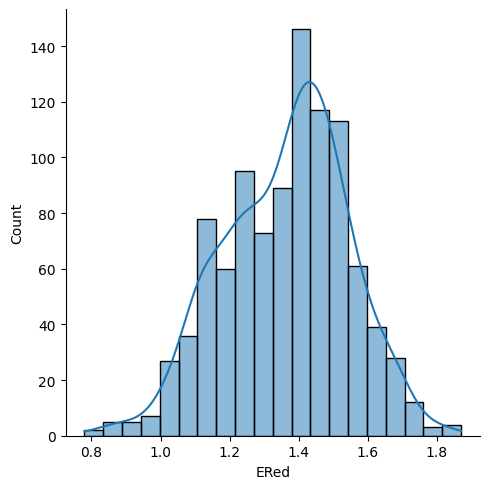

In [110]:
sns.displot(df,x="ERed",kde=True,bins=20)
plt.show()

In [111]:
df.ERed.describe()

count    1000.000000
mean        1.363320
std         0.180167
min         0.780000
25%         1.230000
50%         1.390000
75%         1.490000
max         1.870000
Name: ERed, dtype: float64

**In the dataset, the mean, std and median ERed of 5442 molecules is 1.35, 0.18, and 1.37, respectively**

# Represent molecules in terms of the molecular descriptors 

## We will use the rdkit library to generate molecular descriptors
- RDkit_descriptors() is a function in the Chemfunctions.py

In [112]:
# call function
Mol_descriptors,desc_names = chemfun.RDkit_descriptors(smiles=df.SMILES)
df_rdkit = pd.DataFrame(Mol_descriptors,columns=desc_names)
df_rdkit.head()

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,MaxPartialCharge,MinPartialCharge,MaxAbsPartialCharge,MinAbsPartialCharge,FpDensityMorgan1,FpDensityMorgan2,FpDensityMorgan3,BCUT2D_MWHI,BCUT2D_MWLOW,BCUT2D_CHGHI,BCUT2D_CHGLO,BCUT2D_LOGPHI,BCUT2D_LOGPLOW,BCUT2D_MRHI,BCUT2D_MRLOW,BalabanJ,BertzCT,Chi0,Chi0n,Chi0v,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,Chi3n,Chi3v,Chi4n,Chi4v,HallKierAlpha,Ipc,Kappa1,Kappa2,Kappa3,LabuteASA,PEOE_VSA1,PEOE_VSA10,PEOE_VSA11,PEOE_VSA12,PEOE_VSA13,PEOE_VSA14,PEOE_VSA2,PEOE_VSA3,PEOE_VSA4,PEOE_VSA5,PEOE_VSA6,PEOE_VSA7,PEOE_VSA8,PEOE_VSA9,SMR_VSA1,SMR_VSA10,SMR_VSA2,SMR_VSA3,SMR_VSA4,SMR_VSA5,SMR_VSA6,SMR_VSA7,SMR_VSA8,SMR_VSA9,SlogP_VSA1,SlogP_VSA10,SlogP_VSA11,SlogP_VSA12,SlogP_VSA2,SlogP_VSA3,SlogP_VSA4,SlogP_VSA5,SlogP_VSA6,SlogP_VSA7,SlogP_VSA8,SlogP_VSA9,TPSA,EState_VSA1,EState_VSA10,EState_VSA11,EState_VSA2,EState_VSA3,EState_VSA4,EState_VSA5,EState_VSA6,EState_VSA7,EState_VSA8,EState_VSA9,VSA_EState1,VSA_EState10,VSA_EState2,VSA_EState3,VSA_EState4,VSA_EState5,VSA_EState6,VSA_EState7,VSA_EState8,VSA_EState9,FractionCSP3,HeavyAtomCount,NHOHCount,NOCount,NumAliphaticCarbocycles,NumAliphaticHeterocycles,NumAliphaticRings,NumAromaticCarbocycles,NumAromaticHeterocycles,NumAromaticRings,NumHAcceptors,NumHDonors,NumHeteroatoms,NumRotatableBonds,NumSaturatedCarbocycles,NumSaturatedHeterocycles,NumSaturatedRings,RingCount,MolLogP,MolMR,fr_Al_COO,fr_Al_OH,fr_Al_OH_noTert,fr_ArN,fr_Ar_COO,fr_Ar_N,fr_Ar_NH,fr_Ar_OH,fr_COO,fr_COO2,fr_C_O,fr_C_O_noCOO,fr_C_S,fr_HOCCN,fr_Imine,fr_NH0,fr_NH1,fr_NH2,fr_N_O,fr_Ndealkylation1,fr_Ndealkylation2,fr_Nhpyrrole,fr_SH,fr_aldehyde,fr_alkyl_carbamate,fr_alkyl_halide,fr_allylic_oxid,fr_amide,fr_amidine,fr_aniline,fr_aryl_methyl,fr_azide,fr_azo,fr_barbitur,fr_benzene,fr_benzodiazepine,fr_bicyclic,fr_diazo,fr_dihydropyridine,fr_epoxide,fr_ester,fr_ether,fr_furan,fr_guanido,fr_halogen,fr_hdrzine,fr_hdrzone,fr_imidazole,fr_imide,fr_isocyan,fr_isothiocyan,fr_ketone,fr_ketone_Topliss,fr_lactam,fr_lactone,fr_methoxy,fr_morpholine,fr_nitrile,fr_nitro,fr_nitro_arom,fr_nitro_arom_nonortho,fr_nitroso,fr_oxazole,fr_oxime,fr_para_hydroxylation,fr_phenol,fr_phenol_noOrthoHbond,fr_phos_acid,fr_phos_ester,fr_piperdine,fr_piperzine,fr_priamide,fr_prisulfonamd,fr_pyridine,fr_quatN,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,4.456023,1.020889,4.456023,1.020889,0.861773,291.424,270.256,291.151767,108,0,0.109421,-0.371076,0.371076,0.109421,1.300000,2.100000,2.850000,32.140682,10.056719,2.243910,-2.382209,2.387529,-2.421053,6.996096,0.412244,2.063612,621.296943,14.275656,12.550094,13.366590,9.575387,6.943478,7.673774,5.713135,6.241583,3.990306,4.532875,2.790050,3.370123,-1.40,50883.396945,13.577001,5.179478,2.226066,123.668114,14.699729,11.033401,0.0,0.0,0.0,0.0,0.0,0.0,8.74708,0.0,0.000000,27.085448,38.790149,23.102960,0.000000,34.136361,0.0,13.64699,0.0,6.923737,57.121861,11.629819,0.0,0.0,9.799819,11.374773,0.0,11.728187,60.969031,0.000000,6.923737,5.563451,6.066367,0.0,11.033401,0.0,35.50,0.0,0.0,0.0,0.0,0.000000,37.212427,28.666411,0.000000,0.0,57.579929,0.000000,8.854512,1.301269,7.048598,0.000000,5.955116,0.0,2.183519,0.000000,6.418928,6.404726,0.571429,20,0,5,0,1,1,1,1,2,6,0,6,3,0,0,0,3,1.81752,86.1890,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,5,0,0,0,2,0,0,0,0,0,0,0,0,0,2,1,0,0,0,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,5.243940,0.748371,5.243940,0.748371,0.864637,292.408,272.248,292.135782,108,0,0.109421,-0.382853,0.382853,0.109421,1.300000,2.100000,2.850000,32.140682,10.052673,2.253246,-2.390295,2.392744,-2.423841,6.996097,0.204850,2.122519,612.484865,14.112520,12.218235,13.034732,9.757550,7.005867,7.736164,5.060772,5.589220,3.984172,4.526742,2.920064,3.500137,-1.40,63046.529091,13.577001,5.535354,2.125124,123.021825,14.536682,11.033401,0.0,0.0,0.0,0.0,0.0,0.0,8.747

# Data Cleaning

1. Remove columns with NaN
2. Remove duplicate columns
3. Remove columns with unique values
4. Remove columns with low std
5. Remove highly correlated features


In [113]:
print(f'Shape of the df_rdkit before cleaning: {df_rdkit.shape}')
df_rdkit=chemfun.remove_nan_columns(df=df_rdkit)
df_rdkit=chemfun.remove_duplicate_columns(df=df_rdkit)
df_rdkit=chemfun.remove_columns_uniquevalues(df=df_rdkit)
df_rdkit=chemfun.remove_columns_low_std(df=df_rdkit)
df_rdkit=chemfun.remove_corr_features(df=df_rdkit,corr_cutoff=0.5)
print(f'Shape of the df_rdkit after cleaning: {df_rdkit.shape}')

Shape of the df_rdkit before cleaning: (1000, 208)
Removed 0 columns with nan
Removed 0 duplicate columns
Removed 92 columns values with a unique value
Removed 22 columns with std < 0.3 
Dropped 83 features with correlation coeff. > 0.50
Shape of the df_rdkit after cleaning: (1000, 11)


# With some data cleaning we were able to reduce the number of descriptors from 208 to 10

## we removed features with pearson corr. coeff. > 0.5 to reduce the number of features and better visulaization. 

In [114]:
df_rdkit.head()

,MaxEStateIndex,MolWt,PEOE_VSA10,PEOE_VSA13,PEOE_VSA6,SMR_VSA3,SMR_VSA4,SlogP_VSA4,EState_VSA4,EState_VSA6,fr_unbrch_alkane
0,4.456023,291.424,11.033401,0.0,0.000000,13.64699,0.0,6.923737,37.212427,0.000000,0
1,5.243940,292.408,11.033401,0.0,0.000000,8.74708,0.0,6.923737,43.819309,7.109798,0
2,4.487068,291.424,11.033401,0.0,0.000000,8.74708,0.0,0.000000,36.355057,0.000000,0
3,4.513689,305.451,11.033401,0.0,6.923737,8.74708,0.0,0.000000,55.865391,0.000000,0
4,4.512897,305.451,11.033401,0.0,0.000000,8.74708,0.0,0.000000,42.899813,0.000000,0


TODO: Scale data, and Train a linear regression model

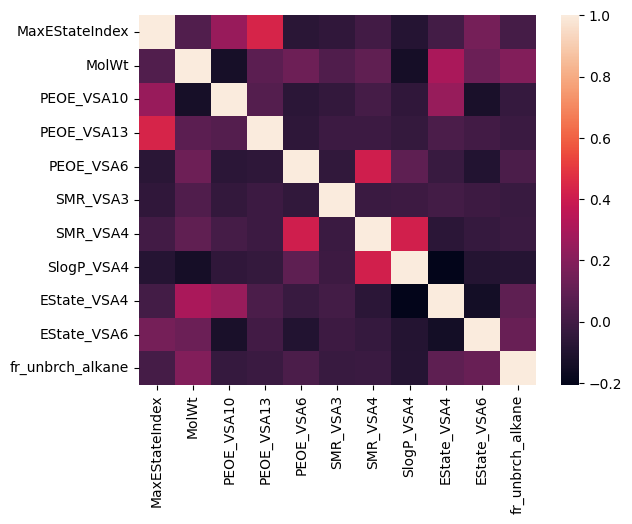

In [115]:
sns.heatmap(df_rdkit.corr())
plt.show()

# Let's make pairplot to visulaize the relationship between independent variables and dependent variable

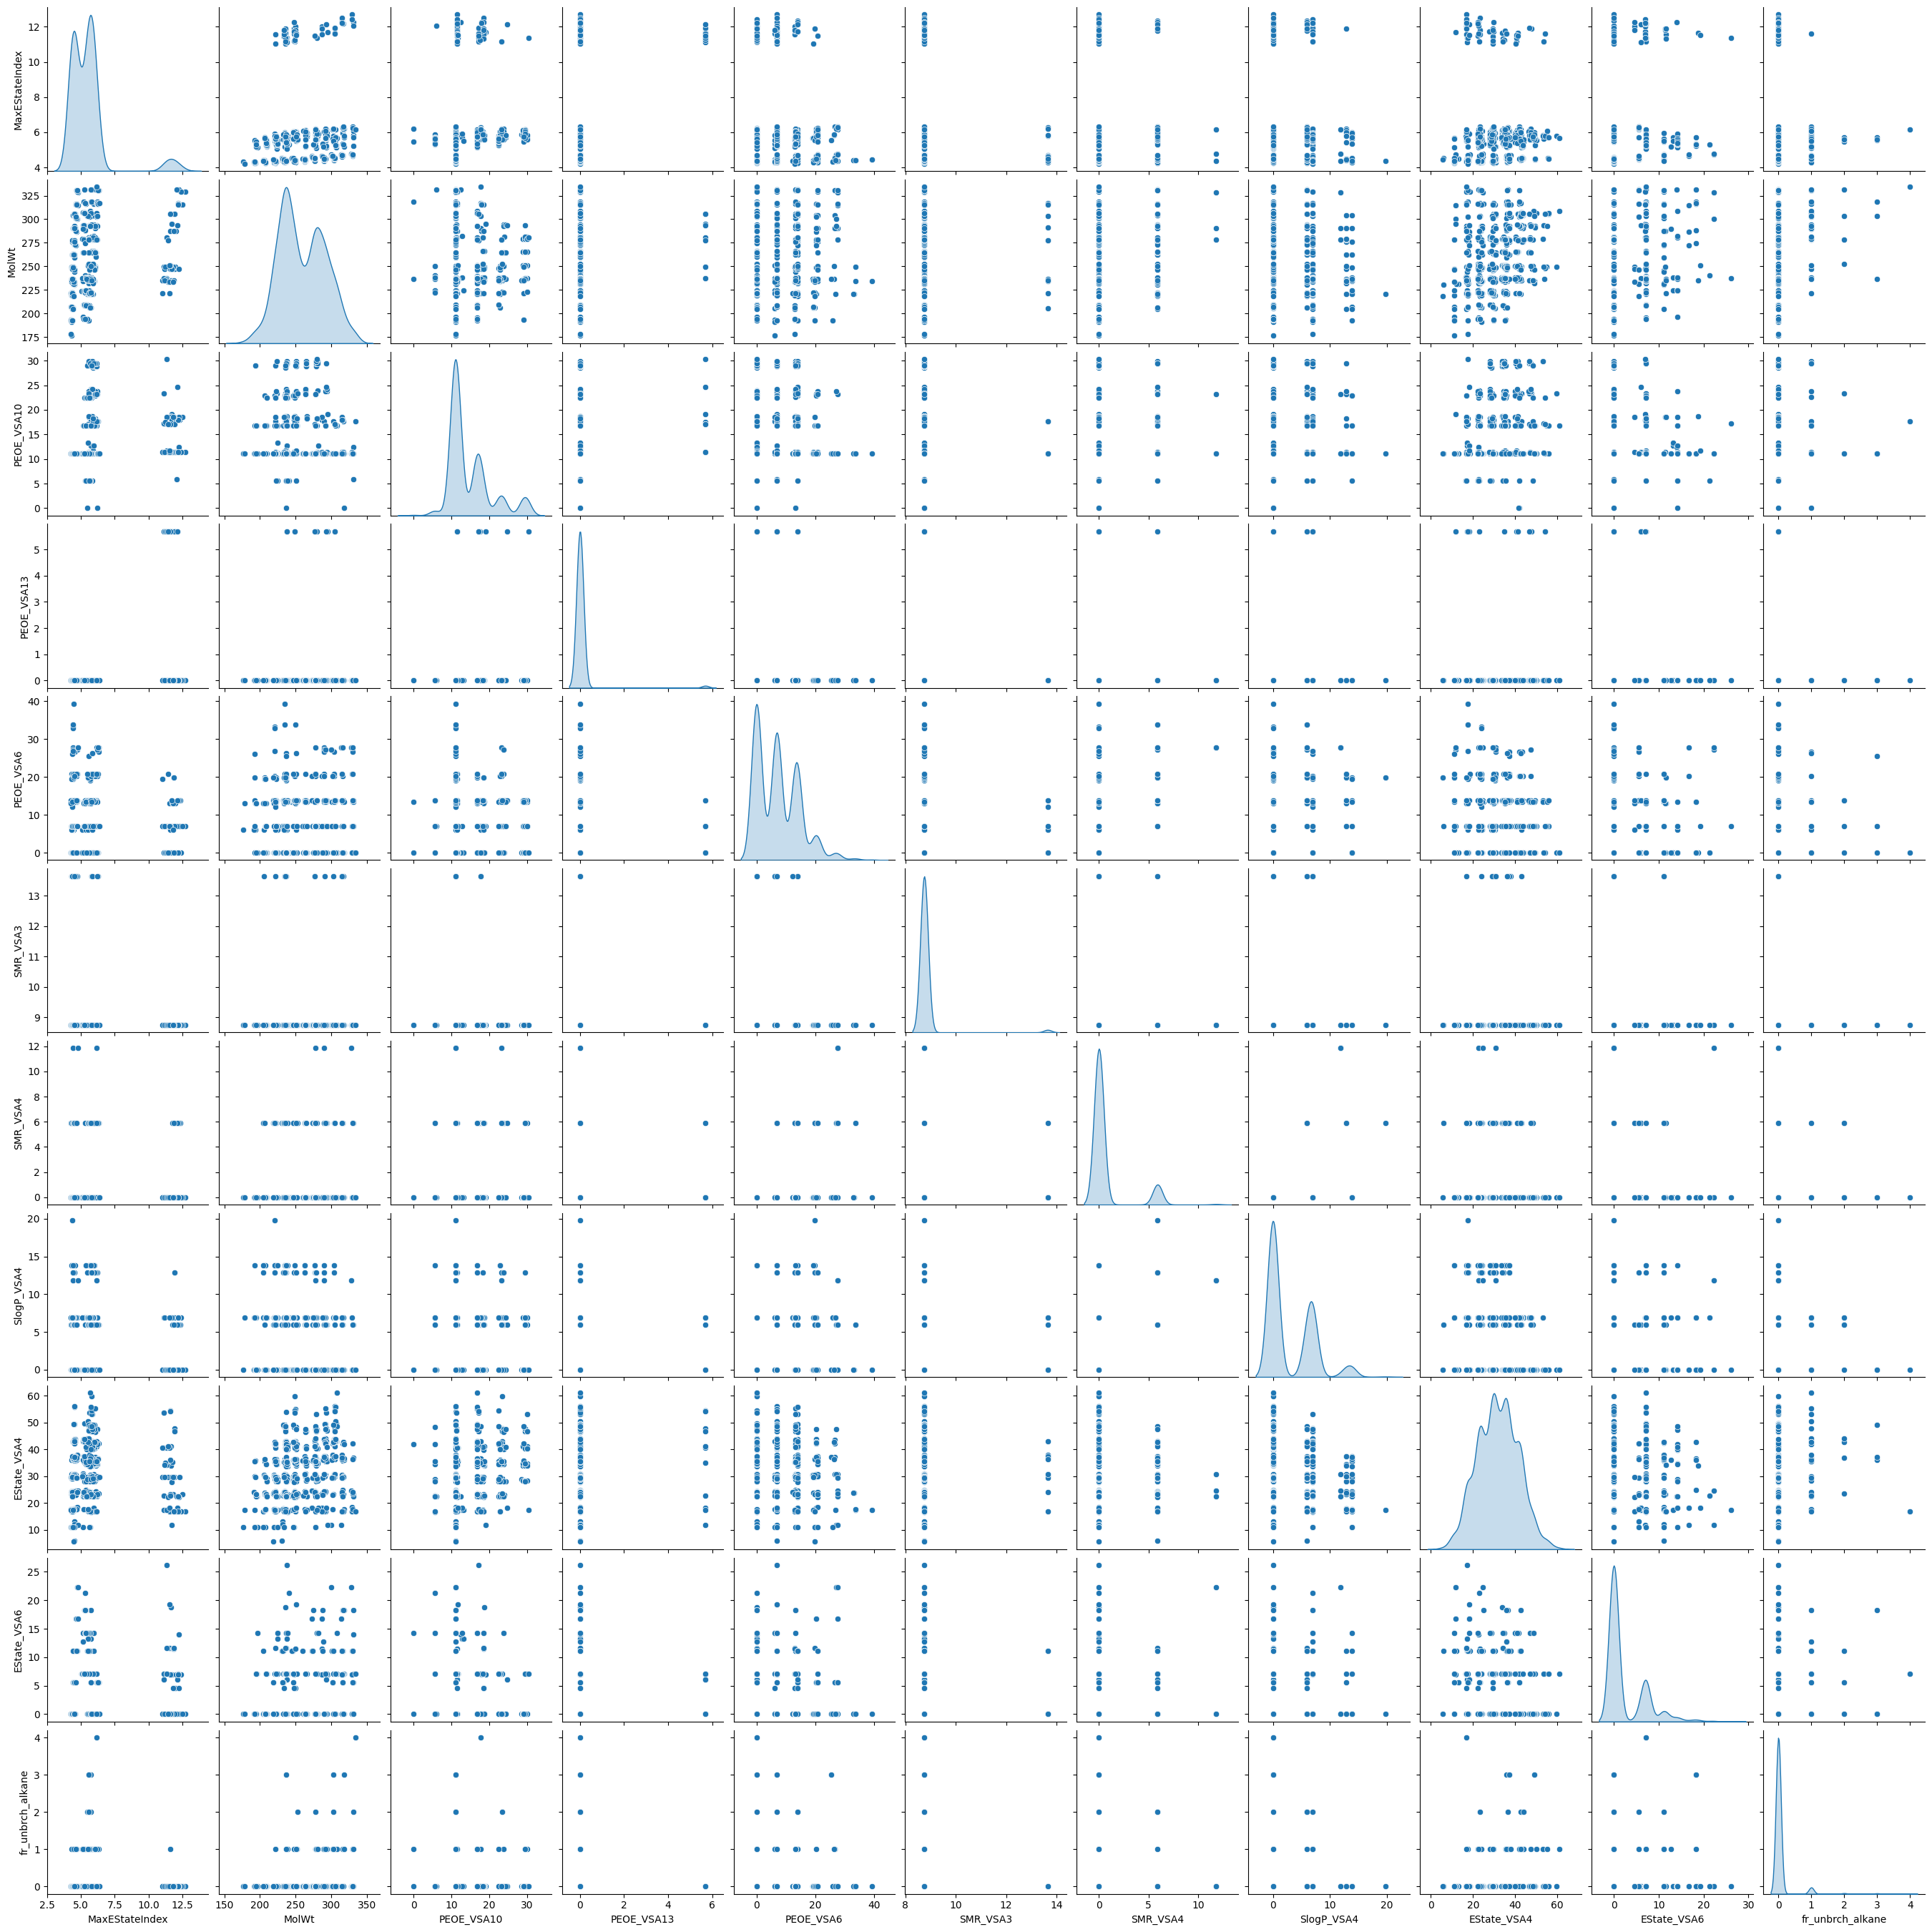

In [116]:
sns.pairplot(data=df_rdkit,diag_kind='kde')
plt.show()

# Let's find out which of the features have normal distribution with the Shapiro-Wilk Test

In [117]:
import importlib
importlib.reload(chemfun)

<module 'Chemfunctions' from 'c:\\Users\\jaina\\Box\\DataScience\\DataScience\\Chemfunctions.py'>

In [118]:
chemfun.check_normality_feat(df=df_rdkit)

Shapiro-Wilk test of normality
0 features are normally distributed
Returning a dataframe with ['Feature', 'Normal_dist', 'W_stat', 'p-value'] columns


,Feature,Normal_dist,W_stat,p-value
0,MaxEStateIndex,False,0.589272,2.172013e-43
1,MolWt,False,0.968624,7.210393e-14
2,PEOE_VSA10,False,0.755974,5.302098e-36
3,PEOE_VSA13,False,0.087423,0.000000e+00
4,PEOE_VSA6,False,0.850242,9.997889e-30
5,SMR_VSA3,False,0.101815,0.000000e+00
6,SMR_VSA4,False,0.379087,0.000000e+00
7,SlogP_VSA4,False,0.698231,6.276878e-39
8,EState_VSA4,False,0.985465,2.045449e-08
9,EState_VSA6,False,0.620518,3.207572e-42
